## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. It is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.

KNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). A new object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at three important aspects:

1. **Ease to interpret output**: KNN algorithm is very straightforward and easy to explain due to its simplicity.

2. **Calculation time**: Computation cost is quite high because we need to compute the distance of each query instance to all training samples.

3. **Predictive Power**: KNN has high predictive power, especially when the data set has enough samples compared to the number of features.

KNN can be useful in solving problems that have solutions that depend on identifying similar objects. An example of this is using KNN to recommend a similar product. Another potential application is for handwriting detection (like OCR), where we can identify that two images are similar.

## K-ближайших соседей (KNN)

K-ближайших соседей (KNN) - это тип обучения на основе экземпляров или ленивого обучения, где функция аппроксимируется только локально, и все вычисления откладываются до оценки функции. Это непараметрический метод, используемый для классификации и регрессии. В обоих случаях входные данные состоят из k ближайших обучающих примеров в пространстве признаков.

KNN - это простой алгоритм, который хранит все доступные случаи и классифицирует новые случаи на основе меры сходства (например, функций расстояния). Новый объект классифицируется по большинству голосов его соседей, при этом объекту присваивается класс, наиболее распространенный среди его k ближайших соседей.

KNN может быть использован для прогнозирования как в задачах классификации, так и регрессии. Однако на практике он чаще используется в задачах классификации. Для оценки любой техники мы обычно смотрим на три важных аспекта:

1. **Легкость интерпретации вывода**: алгоритм KNN очень прост и легко объясним благодаря своей простоте.

2. **Время вычисления**: вычислительная стоимость довольно высока, потому что нам нужно вычислить расстояние каждого запроса до всех обучающих выборок.

3. **Прогнозирующая способность**: KNN обладает высокой прогнозирующей способностью, особенно когда в наборе данных достаточно образцов по сравнению с количеством признаков.

KNN может быть полезен при решении проблем, решения которых зависят от идентификации подобных объектов. Примером этого может служить использование KNN для рекомендации подобного продукта. Другое потенциальное применение - это распознавание рукописного текста (например, OCR), где мы можем определить, что два изображения схожи.

Accuracy: 0.9705


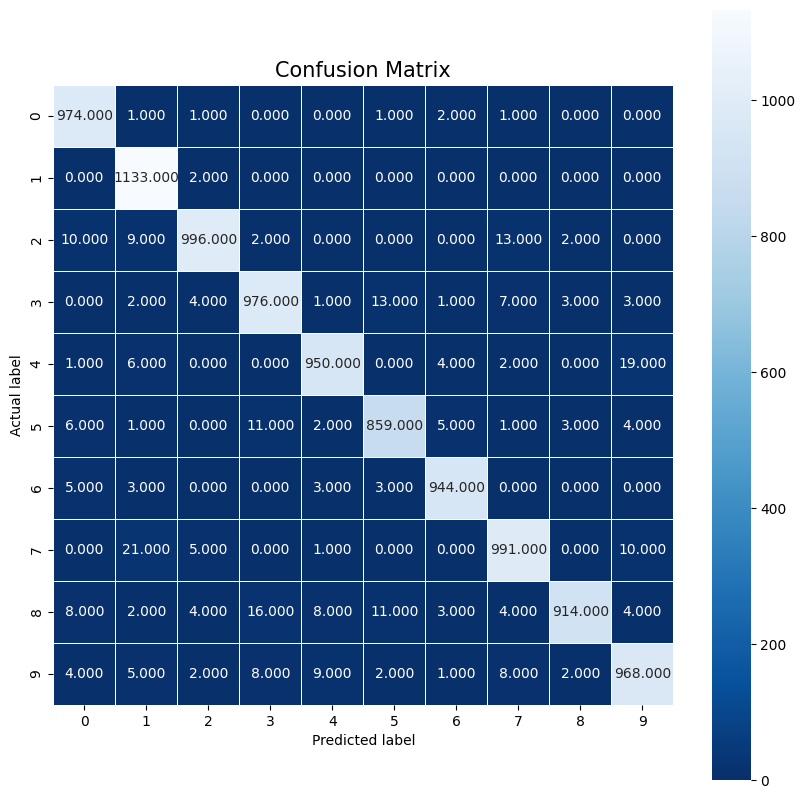

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class KNNClassifier:
    """
    A class used to represent a K-Nearest Neighbors (KNN) Classifier.

    ...

    Attributes
    ----------
    n_neighbors : int
        The number of neighbors to use for the KNN algorithm.
    knn : sklearn.neighbors.KNeighborsClassifier
        The KNN classifier from scikit-learn.
    X_train : numpy.ndarray
        The training data.
    y_train : numpy.ndarray
        The training labels.
    X_test : numpy.ndarray
        The test data.
    y_test : numpy.ndarray
        The test labels.
    predictions : numpy.ndarray
        The predictions made by the classifier on the test data.

    Methods
    -------
    load_data():
        Loads the MNIST data.
    train():
        Trains the KNN classifier.
    predict():
        Makes predictions on the test data.
    accuracy():
        Returns the accuracy of the classifier.
    plot_confusion_matrix():
        Plots a confusion matrix of the classifier's predictions.
    """

    def __init__(self, n_neighbors=3):
        """
        Constructs all the necessary attributes for the KNNClassifier object.

        Parameters
        ----------
            n_neighbors : int
                The number of neighbors to use for the KNN algorithm.
        """

        self.n_neighbors = n_neighbors
        self.knn = neighbors.KNeighborsClassifier(n_neighbors=self.n_neighbors)

    def load_data(self):
        """Loads the MNIST data."""

        # Define a transform to normalize the data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])

        # Download and load the training data
        trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
        testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

        # Use DataLoader to handle batching of the data
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=True)

        # Convert the data to numpy arrays
        traindata = next(iter(trainloader))
        testdata = next(iter(testloader))

        self.X_train = traindata[0].numpy().reshape(traindata[0].shape[0], -1)
        self.y_train = traindata[1].numpy()

        self.X_test = testdata[0].numpy().reshape(testdata[0].shape[0], -1)
        self.y_test = testdata[1].numpy()

    def train(self):
        """Trains the KNN classifier."""

        self.knn.fit(self.X_train, self.y_train)

    def predict(self):
        """Makes predictions on the test data."""

        self.predictions = self.knn.predict(self.X_test)

    def accuracy(self):
        """Returns the accuracy of the classifier."""

        return accuracy_score(self.y_test, self.predictions)

    def plot_confusion_matrix(self):
        """Plots a confusion matrix of the classifier's predictions."""

        cm = confusion_matrix(self.y_test, self.predictions)
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.title('Confusion Matrix', size = 15);
        plt.show()

# Example usage:
knn_classifier = KNNClassifier(n_neighbors=3)
knn_classifier.load_data()
knn_classifier.train()
knn_classifier.predict()
print("Accuracy:", knn_classifier.accuracy())
knn_classifier.plot_confusion_matrix()
